## [3] Relationships

Up until this point, you've only looked at one variable at a time. In this chapter, you'll explore relationships between variables two at a time, using scatter plots and other visualizations to extract insights from a new dataset obtained from the Behavioral Risk Factor Surveillance Survey (BRFSS). You'll also learn how to quantify those relationships using correlation and simple regression.

### Exploring relationships betweet variables

##### Behavioral Risk Factor Surveillance Survey (BRFSS)
- run by the Centers for Disease Control
- around 400,000 respondents, random subsampled to 100,000

#### Scatter plot


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
brfss = pd.read_hdf('datasets/brfss.hdf5', 'brfss')

# in cm
height = brfss['HTM4']
# in kg
weight = brfss['WTKG3']

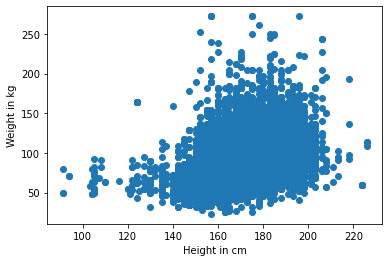

In [3]:
plt.plot(height, weight, 'o')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

- In general, it looks like taller people are heavier. Although, it looks 'overplotted', there are data points piled on top of each other so it's hard to tell which areas has a lot of points and which one has just one. 
    - this result can be misleading

### Transparency
- using `alpha` parameter - the lower the alpha value, the more transparent each data point is.

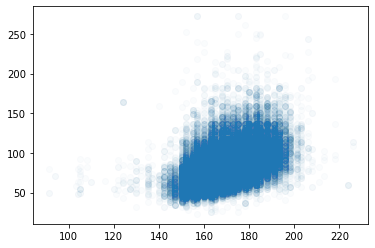

In [4]:
# better, but still overpopulated
plt.plot(height, weight, 'o', alpha = 0.02)
plt.show()

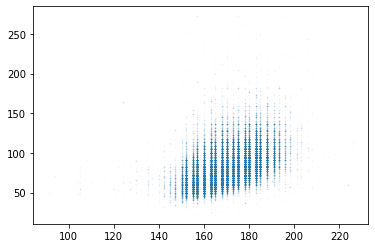

In [5]:
# less saturated
plt.plot(height, weight, 'o', alpha = 0.02, markersize = 1)
plt.show()

### Jittering
- adding random noise

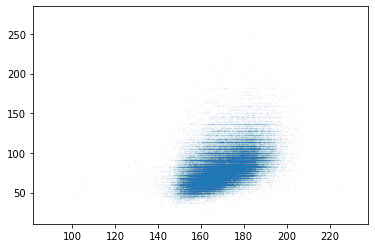

In [6]:
# added noise: mean = 0; std = 2
height_jitter = height + np.random.normal(0, 2, size = len(brfss))
plt.plot(height_jitter, weight, 'o', alpha = 0.02, markersize = 1)
plt.show()

- The columns are gone, there are rows where people rounded off their weight (the plot is stretch)
    - solution: jitter the weight too.

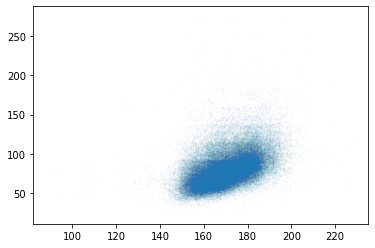

In [7]:
# added noise: mean = 0; std = 2
height_jitter = height + np.random.normal(0, 2, size = len(brfss))
weight_jitter = weight + np.random.normal(0, 2, size = len(brfss))
plt.plot(height_jitter, weight_jitter, 'o', alpha = 0.02, markersize = 1)
plt.show()

### Zoom
- zoom on the area where most of the data points are

`axis()`
- pyplot function sets the lower and upper bounds for the x and y axis.

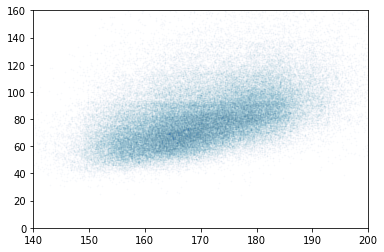

In [8]:
# heights: 140-200 cm
# weights: up to 160
plt.plot(height_jitter, weight_jitter, 'o', alpha = 0.02, markersize = 1)
plt.axis([140, 200, 0, 160])
plt.show()

##### Before and After

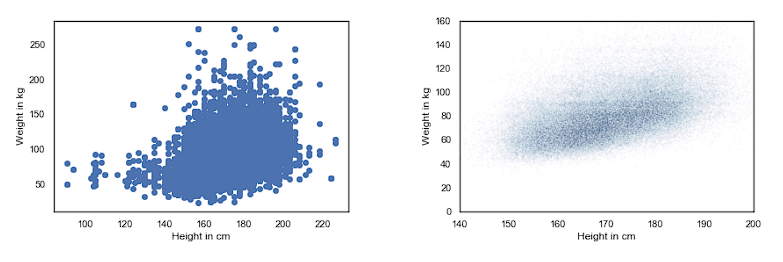

**PMF of age**

Do people tend to gain weight as they get older? We can answer this question by visualizing the relationship between weight and age. But before we make a scatter plot, it is a good idea to visualize distributions one variable at a time. Here, you'll visualize age using a bar chart first. Recall that all PMF objects have a `.bar()` method to make a bar chart.

The BRFSS dataset includes a variable, `'AGE'` (note the capitalization!), which represents each respondent's age. To protect respondents' privacy, ages are rounded off into 5-year bins. `'AGE'` contains the midpoint of the bins.

- Extract the variable `'AGE'` from the DataFrame `brfss` and assign it to `age`.
- Get the PMF of `age` and plot it as a bar chart.

In [9]:
# Extract age
#age = brfss['AGE']

# Plot the PMF
#pmf_age = Pmf(age)
#pmf_age.bar()

# Label the axes
#plt.xlabel('Age in years')
#plt.ylabel('PMF')
#plt.show()

> Notice that the last age range is bigger than the others. That's the kind of thing you see when you plot distributions. 
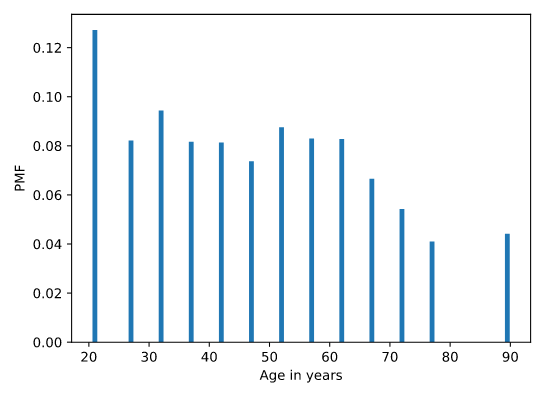

**Scatter plot**

Now let's make a scatterplot of `weight` versus `age`. To make the code run faster, I've selected only the first 1000 rows from the `brfss` DataFrame.

`weight` and `age` have already been extracted for you. Your job is to use `plt.plot()` to make a scatter plot.

- Make a scatter plot of `weight` and `age` with format string `'o'` and `alpha = 0.1`.

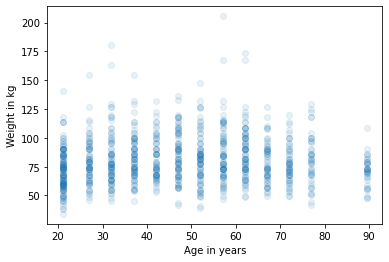

In [10]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Extract age and weight
age = brfss['AGE']
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', alpha = 0.1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()

**Jittering**

In the previous exercise, the ages fall in columns because they've been rounded into 5-year bins. If we jitter them, the scatter plot will show the relationship more clearly.

- Add random noise to `age` with mean `0` and standard deviation `2.5`.
- Make a scatter plot between `weight` and `age` with marker size `5` and `alpha = 0.2`. Be sure to also specify `'o'`.

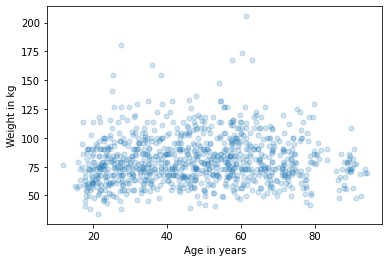

In [11]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Add jittering to age
age = brfss['AGE'] + np.random.normal(0, 2.5, size = len(brfss))
# Extract weight
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', markersize = 5, alpha = 0.2)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

### Visualizing Relationships

In [12]:
brfss = pd.read_hdf('datasets/brfss.hdf5', 'brfss')

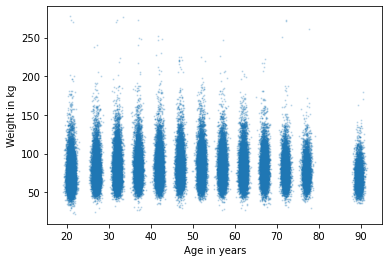

In [13]:
age = brfss['AGE'] + np.random.normal(0, 0.5, size = len(brfss))
# added so horizontal rows are not visible
weight = brfss['WTKG3'] + np.random.normal(0, 2, size = len(brfss))

# Make a scatter plot
plt.plot(age, weight, 'o', markersize = 1, alpha = 0.2)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

- Use KDE to estimate the density function in each column and plot it using violin plot.
    - missing data must be removed

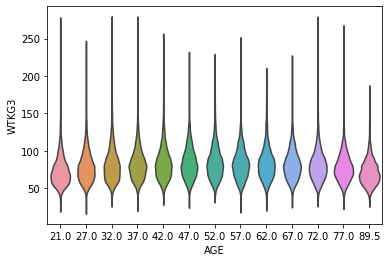

In [14]:
data = brfss.dropna(subset = ['AGE', 'WTKG3'])
sns.violinplot(x = 'AGE', y = 'WTKG3', data = data, inner = None)
plt.show()

- Each column is graphical representation of the distribution of weight in one age group. The width of each shape is proportional to the estimated density 

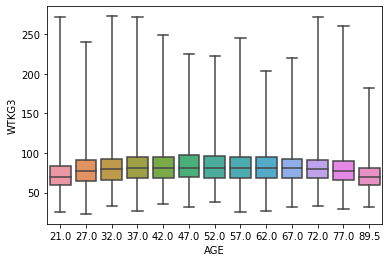

In [15]:
# box plot
# whis = 10, turns off a feature not needed atm (outliers, i think)
sns.boxplot(x = 'AGE', y = 'WTKG3', data = data, whis = 10)
plt.show()

- each box represents the interquantile range, or IQR, from the 25th to the 75th percenitle
- the line in the middle of each boxes is the median
- the spines sticking out of the top and bottow show the minimum and maximum values

> looking at the median, people in their 40s are the heaviest, younger and older people are lighter.
  the sizes of the boxes, people in their 40s have the most variability in weight
  the heaviest people are much farther from the median than the lightest people
  
- for data skewed toward higher values, it is useful to look it on a logarithmic scale

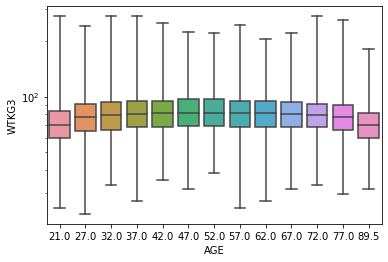

In [16]:
sns.boxplot(x = 'AGE', y = 'WTKG3', data = data, whis = 10)
plt.yscale('log')
plt.show()

**Height and weight**

Previously we looked at a scatter plot of height and weight, and saw that taller people tend to be heavier. Now let's take a closer look using a box plot. The `brfss` DataFrame contains a variable `'_HTMG10'` that represents height in centimeters, binned into 10 cm groups.

Recall how Allen created the box plot of `'AGE'` and `'WTKG3'` in the video, with the y-axis on a logarithmic scale:

`
sns.boxplot(x = 'AGE', y = 'WTKG3', data = data, whis = 10)
plt.yscale('log')
`

- Fill in the parameters of `.boxplot()` to plot the distribution of weight (`'WTKG3'`) in each height (`'_HTMG10'`) group. Specify `whis = 10`, just as was done in the video.
- Add a line to plot the y-axis on a logarithmic scale.

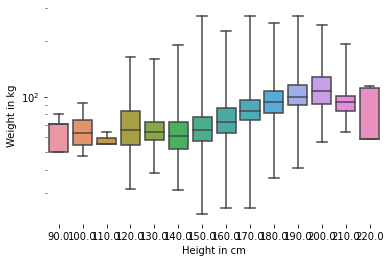

In [18]:
# Drop rows with missing data
data = brfss.dropna(subset = ['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot(x = '_HTMG10', y = 'WTKG3', data = data, whis = 10)

# Plot the y-axis on a log scale
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left = True, bottom = True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

**Distribution of income**

In the next two exercises we'll look at relationships between income and other variables. In the BRFSS, income is represented as a categorical variable; that is, respondents are assigned to one of 8 income categories. The variable name is `'INCOME2'`. Before we connect income with anything else, let's look at the distribution by computing the PMF. Recall that all `Pmf` objects have a `.bar()` method.

- Extract `'INCOME2'` from the `brfss` DataFrame and assign it to `income`.
- Plot the PMF of `income` as a bar chart.

In [20]:
# Extract income
#income = brfss['INCOME2']

# Plot the PMF
#Pmf(income).bar()

# Label the axes
#plt.xlabel('Income level')
#plt.ylabel('PMF')
#plt.show()

> Almost half of the respondents are in the top income category, so this dataset doesn't distinguish between the highest incomes and the median. But maybe it can tell us something about people with incomes below the median.
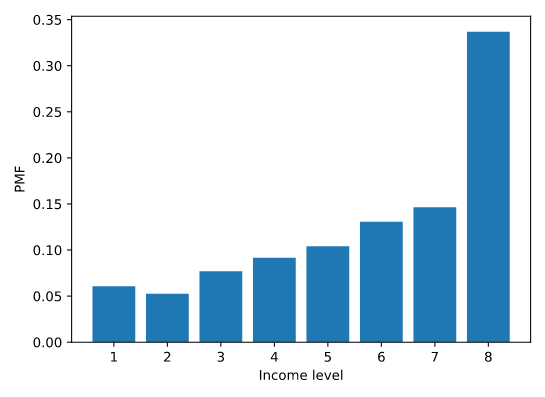

**Income and height**

Let's now use a violin plot to visualize the relationship between income and height.

- Create a violin plot to plot the distribution of height (`'HTM4'`) in each income (`'INCOME2'`) group. Specify `inner = None` to simplify the plot.

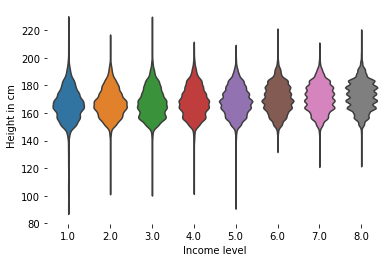

In [23]:
# Drop rows with missing data
data = brfss.dropna(subset = ['INCOME2', 'HTM4'])

# Make a violin plot
sns.violinplot(x = 'INCOME2', y = 'HTM4', data = data, inner = None)

# Remove unneeded lines and label axes
sns.despine(left = True, bottom = True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()

> It looks like there is a weak positive relationsip between income and height, at least for incomes below the median. 

### Correlation
- coefficient of correlation, which quantifies the strength of variables' relationships

**Correlation Coefficient**

- Pearson's correlation coefficient, which is a number between -1 and 1 that quantifies the strength of a linear relationship between variables

In [24]:
columns =  ['HTM4', 'WTKG3', 'AGE']
subset = brfss[columns]

# the result is a correlation matrix
subset.corr()

,HTM4,WTKG3,AGE
HTM4,1.000000,0.474203,-0.093684
WTKG3,0.474203,1.000000,0.021641
AGE,-0.093684,0.021641,1.000000


#### Correlation matrix

- Height with itself: 1
- Height and weight: 0.47
    - postivie; taller people are heavier, and moderate in strength; it has some predective value
- Height and age: -0.09
    - negative; older people tend to be shorter, but it's weak; knowing someone's age would not help much if you're trying to guess their height
- Weight and age: 0.02
    - why is the correlation so low?
    - the relationship is non-linear as people in their 40s are heavier than younger and older than 40
    - **correlation only works for linear relationships**

In [ ]:
# contains equally-spaced points
xs = np.linspace(-1, 1)
ys = xs**2
ys += normal(0, 0.5, len(xs))

> 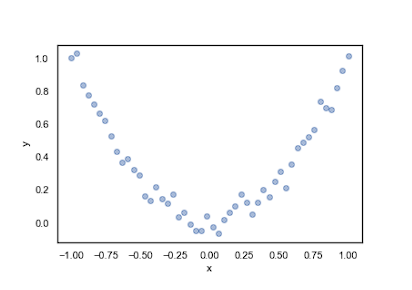

- If correlation is high (close to 1 or -1), can conlude there is a strong linear relationship
- If correlation is close to 0, there might be a strong, **non-linear** relationship

**You keep using that word**
- I do not think it means what you think it means.
    - correlation says nothing about slope.
- If two variables are correlated, means we can use one to predict the other.
    - in statistics, what we care about is the slope of the line.

**Computing correlations**

The purpose of the BRFSS is to explore health risk factors, so it includes questions about diet. The variable `'_VEGESU1'` represents the number of servings of vegetables respondents reported eating per day.

Let's see how this variable relates to age and income.

- From the `brfss` DataFrame, select the columns `'AGE'`, `'INCOME2'`, and `'_VEGESU1'`.
- Compute the correlation matrix for these variables.

In [27]:
# Select columns
columns = ['AGE', 'INCOME2', '_VEGESU1']
subset = brfss[columns]

# Compute the correlation matrix
subset.corr()

,AGE,INCOME2,_VEGESU1
AGE,1.000000,-0.015158,-0.009834
INCOME2,-0.015158,1.000000,0.119670
_VEGESU1,-0.009834,0.119670,1.000000


**Interpreting correlations**

In the previous exercise, the correlation between income and vegetable consumption is about `0.12`. The correlation between age and vegetable consumption is about `-0.01`.

Which of the following are correct interpretations of these results:

- A: People with higher incomes eat more vegetables.
- B: The relationship between income and vegetable consumption is linear.
- C: Older people eat more vegetables.
- D: There could be a strong nonlinear relationship between age and vegetable consumption.

> The correlation between income and vegetable consumption is small, but it suggests that there is a relationship. But a correlation close to 0 does mean there is no relationship.

### Simple Regression

`linregress()`
- estimates the slope of the line
    - slope: slope of the line of bestfit for the data
    - intercept: intercept
    - can't handle NaNs, so it should be removed

In [28]:
from scipy.stats import linregress

# Hypothetical 1
# res = linregress(xs, ys)

- rvalue - correlation

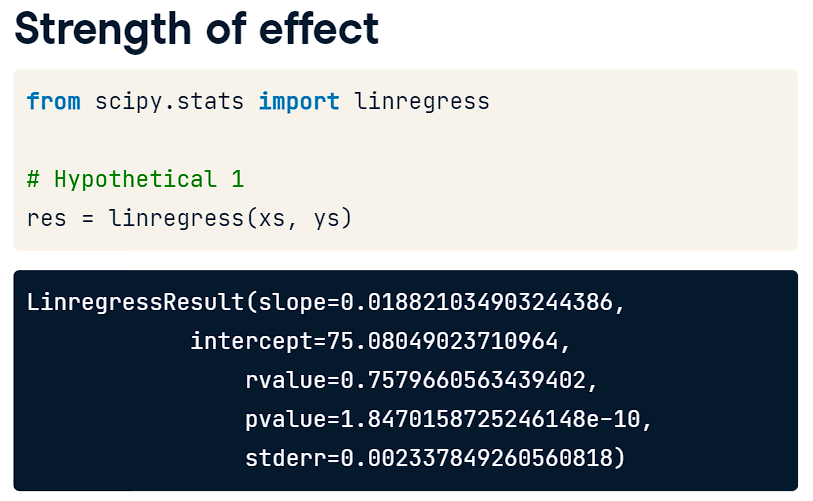

vs


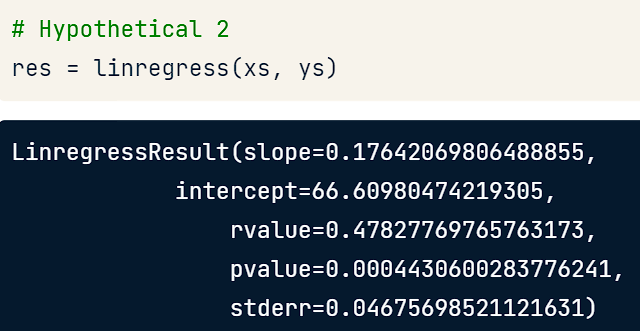

> - The strength of the effect, as measured by the slope of the line, is about 10x higher in the 2nd example.
  - The linregress() results can be used to compute the line of best fit


### Regression Lines
1. Get the mean and max of the observed.
2. Multiply it by the slope and add the intercept.

In [ ]:
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')

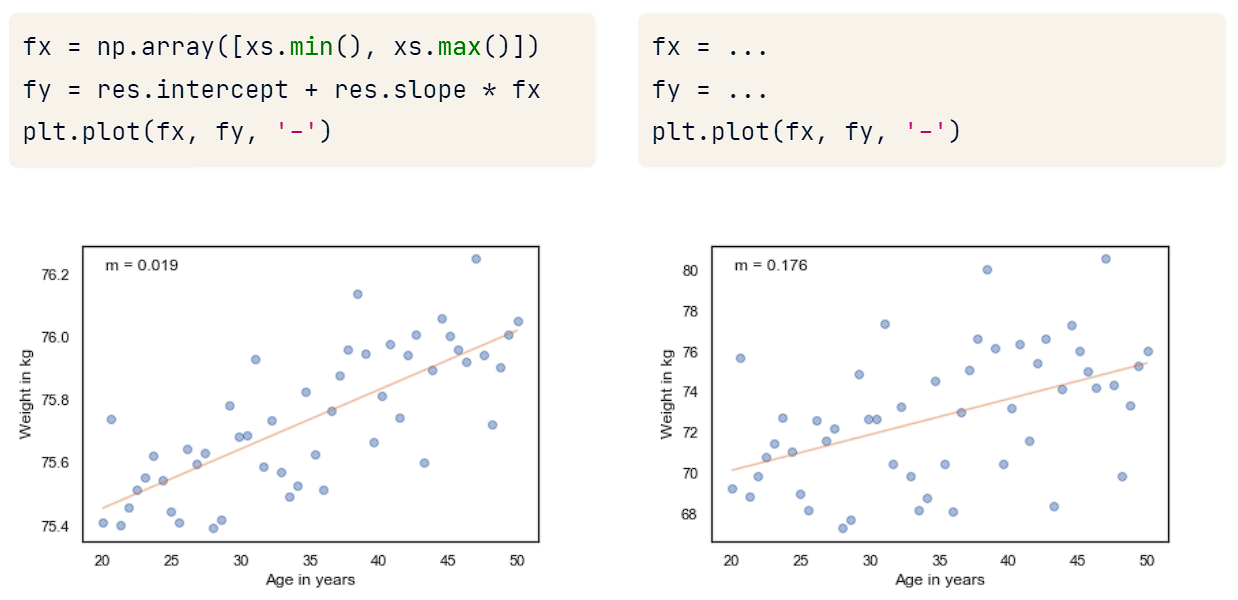
> Look closely at the vertical scales, the right almost is 10x higher

In [32]:
subset = brfss.dropna(subset = ['WTKG3', 'HTM4'])

# compute the linear regression
xs = subset ['HTM4']
ys = subset['WTKG3']
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.9192115381848179, intercept=-75.12704250330034, rvalue=0.4742030897902462, pvalue=0.0, stderr=0.005632863769802921)


In [ ]:
#fx = np.array([xs.min(), xs.max()])
#fy = res.intercept + res.slope * fx
#plt.plot(fx, fy, '-')

> consistent with the scatterplot
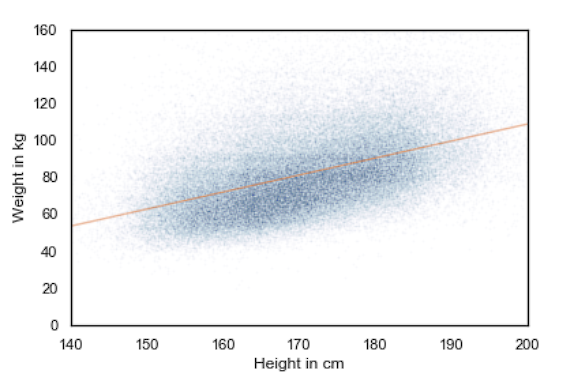

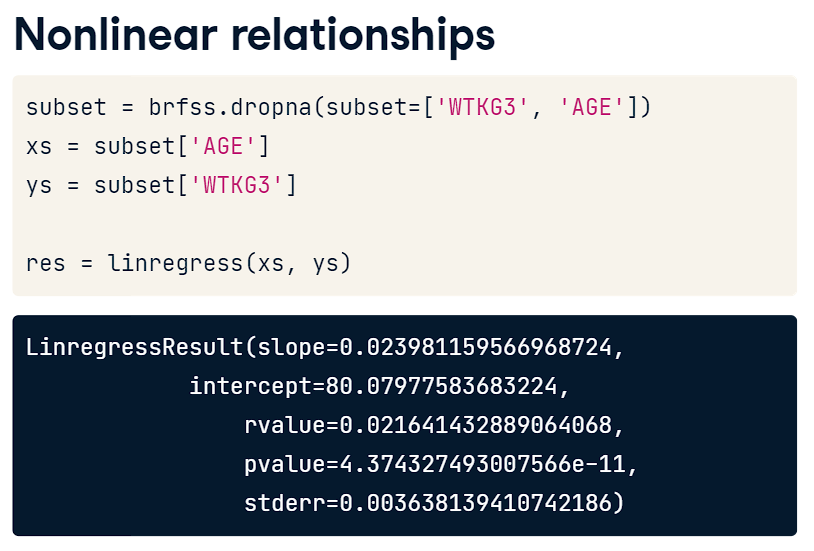
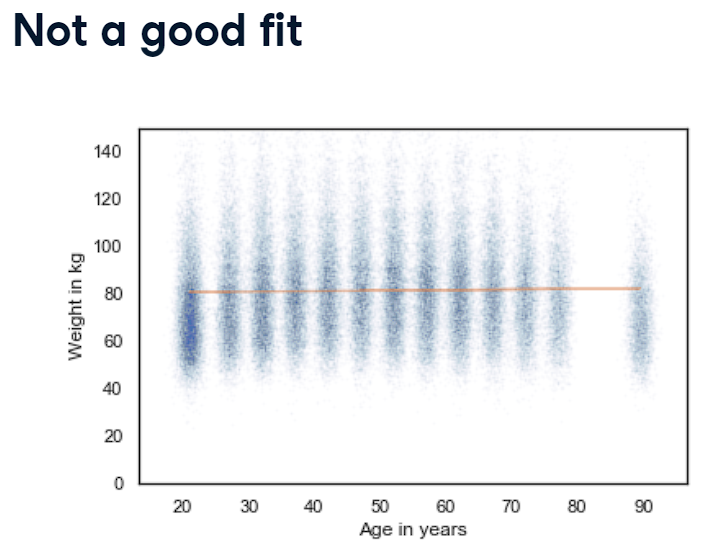

**Income and vegetables
As we saw in a previous exercise, the variable '_VEGESU1' represents the number of vegetable servings respondents reported eating per day.

Let's estimate the slope of the relationship between vegetable consumption and income.

- Extract the columns `'INCOME2'` and `'_VEGESU1'` from subset into `xs` and `ys` respectively.
- Compute the simple linear regression of these variables.

In [35]:
from scipy.stats import linregress

# Extract the variables
subset = brfss.dropna(subset = ['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# Compute the linear regression
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.06988048092105248, intercept=1.5287786243362973, rvalue=0.11967005884864361, pvalue=1.3785039162157718e-238, stderr=0.002110976356332355)


> The estimated slope tells you the increase in vegetable servings from one income group to the next.

**Fit a line**

Continuing from the previous exercise:

- Assume that `xs` and `ys` contain income codes and daily vegetable consumption, respectively, and
- `res` contains the results of a simple linear regression of `ys` onto `xs`.

Now, you're going to compute the line of best fit. NumPy has been imported for you as `np`.

- Set `fx` to the minimum and maximum of `xs`, stored in a NumPy array.
- Set `fy` to the points on the fitted line that correspond to the `fx`.

In [ ]:
# Plot the scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha = 0.2)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha = 0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()

> 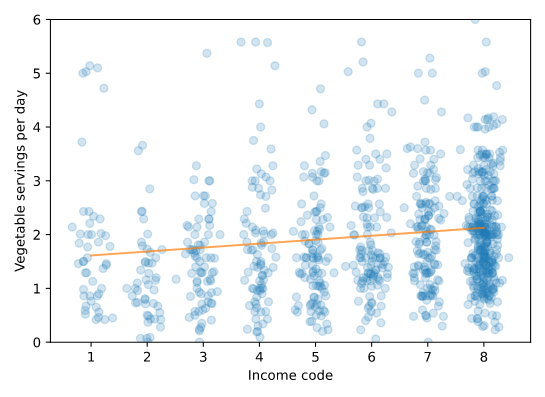